# ASSIGNMENT 3 - Finance Case Study
## Data Engineering:


In [556]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Connecting with the Yahoo! Finance service

In [620]:
# Importing the library
import yfinance as yf

In [621]:
# Making a ticker 
AMZN = yf.Ticker("AMZN")

In [623]:
# Downloading the data as a DataFrame
data = yf.download("AMZN", start="2020-03-01", end="2020-03-30")

[*********************100%***********************]  1 of 1 completed


In [624]:
# Calculating Market Cap
data["MarketCap"] = data["Close"] * data["Volume"]

In [625]:
# DataFrame Preview
data.head(3)

,Open,High,Low,Close,Adj Close,Volume,MarketCap
Date,,,,,,,
2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700,1.321202e+10
2020-03-03,1975.369995,1996.329956,1888.089966,1908.989990,1908.989990,7534500,1.438329e+10
2020-03-04,1946.569946,1978.000000,1922.000000,1975.829956,1975.829956,4772900,9.430439e+09


## Transaction volumes computation and plotting:

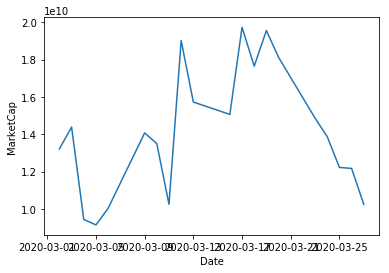

In [634]:
import seaborn as sns
# Plotting Market Cap
data["Date"] = data.index
# Graph for change in Market Cap with time
sns.lineplot(x= data["Date"],y=data["MarketCap"],data=data)

# Download NYSE tickers
### with all the information related to the market capitalization, sector and industry...
### (http://www.nasdaq.com/screening/company-list.aspx)

## Get Stock Labels, Sector and Industries

In [635]:
# Importing libraries

import time
import numpy as np
import pandas as pd 

In [636]:
# reading the file
hfile =pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 3 - Financial/HWK 3 - Financial/data/companylist.csv")


# Converting Market Caps string with M and B to numbers
# Converting MarketCap B and M to numbers
df1 = hfile['MarketCap'].str.strip('$').str.extract(r'(\d+\.\d+)([BM]+)')
hfile['MarketCap'] = df1[0].astype(float) * df1[1].map({'B': 1000000000, 'M':1000000})


# Dropping columns that is not required
hfile = hfile.drop(["IPOyear","Summary Quote"],axis=1)

In [637]:
print("preview of the dataframe: \n",hfile.head(2))

print("\n Shape of the DataFrame :", hfile.shape)

preview of the dataframe: 
   Symbol                    Name  LastSale     MarketCap       Sector  \
0    DDD  3D Systems Corporation     21.92  2.450000e+09   Technology   
1    MMM              3M Company    160.16  1.016000e+11  Health Care   

                                  industry  
0  Computer Software: Prepackaged Software  
1               Medical/Dental Instruments  

 Shape of the DataFrame : (3289, 6)


In [638]:
# filtering out Companies that have MarketCap lower than 50B
hfile = hfile.loc[hfile["MarketCap"]>=50000000000]

In [639]:
print("\n Shape of the DataFrame :", hfile.shape)


 Shape of the DataFrame : (124, 6)


In [640]:
hfile.head()

,Symbol,Name,LastSale,MarketCap,Sector,industry
1,MMM,3M Company,160.16,1.016000e+11,Health Care,Medical/Dental Instruments
10,ABT,Abbott Laboratories,48.86,7.274000e+10,Health Care,Major Pharmaceuticals
11,ABBV,AbbVie Inc.,67.01,1.067500e+11,Health Care,Major Pharmaceuticals
18,ACN,Accenture plc.,96.98,6.334000e+10,Miscellaneous,Business Services
23,ACT,"Actavis, Inc.",306.42,1.202500e+11,Health Care,Major Pharmaceuticals


## Generate dictionaries for companies, sectors and colors:

In [644]:
list_stocks = []
# Iterate over each row 
for index, rows in hfile.iterrows(): 
    # Create list for the current row 
    tim =[rows.Symbol, rows.Name, rows.LastSale,rows.MarketCap, rows.Sector,rows.industry] 
      
    # append the list to the final list 
    list_stocks.append(tim) 

In [645]:
# Parsing through Dataframe to get Company name and sector
diz_sectors={}
for s in list_stocks:
    diz_sectors[s[0]]=s[4]

In [646]:
# Counting sectors 
list_ranking=[]
for s in set(diz_sectors.values()):
    #print(s)
    list_ranking.append((list(diz_sectors.values()).count(s),s))

In [647]:
#preview of ranking list
list_ranking

[(2, nan),
 (8, 'Basic Industries'),
 (20, 'Health Care'),
 (13, 'Energy'),
 (11, 'Capital Goods'),
 (9, 'Consumer Non-Durables'),
 (26, 'Finance'),
 (3, 'Transportation'),
 (4, 'Miscellaneous'),
 (12, 'Public Utilities'),
 (7, 'Technology'),
 (9, 'Consumer Services')]

In [648]:
list_ranking.sort(reverse=True)

list_colors=['red','green','blue','black''cyan','magenta','yellow','pink','brown','violet','orange'] 
#list_colors=['0.0', '0.2', '0.4', '0.6','0.7', '0.8', '0.9'] 


In [649]:
#'white' is an extra color for 'n/a' and 'other' sectors

diz_colors={}

#association color and more represented sectors
for s in list_ranking:
    if s[1]=='n/a': 
        diz_colors[s[1]]='white'
        continue
    if list_colors==[]: 
        diz_colors[s[1]]='white'
        continue

    diz_colors[s[1]]=list_colors.pop(0)

In [650]:
list_ranking

[(26, 'Finance'),
 (20, 'Health Care'),
 (13, 'Energy'),
 (12, 'Public Utilities'),
 (11, 'Capital Goods'),
 (9, 'Consumer Services'),
 (9, 'Consumer Non-Durables'),
 (8, 'Basic Industries'),
 (7, 'Technology'),
 (4, 'Miscellaneous'),
 (3, 'Transportation'),
 (2, nan)]

In [651]:
diz_colors

{'Finance': 'red',
 'Health Care': 'green',
 'Energy': 'blue',
 'Public Utilities': 'blackcyan',
 'Capital Goods': 'magenta',
 'Consumer Services': 'yellow',
 'Consumer Non-Durables': 'pink',
 'Basic Industries': 'brown',
 'Technology': 'violet',
 'Miscellaneous': 'orange',
 'Transportation': 'white',
 nan: 'white'}

## Retrieving historical data

In [652]:
from datetime import datetime

# runs through each company symbol and gives historicaal data for provided dates
diz_comp={}
for a in list_stocks:
    data = yf.download(a[0], start="2020-03-01", end="2020-03-30")
    # Calc % change in return
    if len(data)> 0:
        data["Return"] = data["Adj Close"].pct_change()
        # changing first day value return from Nan to 0
        data["Return"][0] = 0
        # making a date column 
        print(a)
        data["Date"] = data.index.strftime("%d-%b-%Y")
        # Create an empty list 
        Row_list =[] 
        # Iterate over each row 
        for index, rows in data.iterrows(): 
            # Create list for the current row 
            my_list =[rows.Date,rows.Open, rows.Close, rows.Volume, rows.Return]     
            # append the list to the final list 
            Row_list.append(my_list)
        diz_comp[a[0]] = Row_list

[*********************100%***********************]  1 of 1 completed
['MMM', '3M Company', 160.16, 101600000000.0, 'Health Care', 'Medical/Dental Instruments']
[*********************100%***********************]  1 of 1 completed

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



['ABT', 'Abbott Laboratories', 48.86, 72740000000.0, 'Health Care', 'Major Pharmaceuticals']
[*********************100%***********************]  1 of 1 completed
['ABBV', 'AbbVie Inc.', 67.01, 106750000000.0, 'Health Care', 'Major Pharmaceuticals']
[*********************100%***********************]  1 of 1 completed
['ACN', 'Accenture plc.', 96.98, 63340000000.0, 'Miscellaneous', 'Business Services']
[*********************100%***********************]  1 of 1 completed
['ACT', 'Actavis, Inc.', 306.42, 120250000000.0, 'Health Care', 'Major Pharmaceuticals']
[*********************100%***********************]  1 of 1 completed
['BABA', 'Alibaba Group Holding Limited', 90.79, 226570000000.0, 'Miscellaneous', 'Business Services']
[*********************100%***********************]  1 of 1 completed
['MO', 'Altria Group', 50.35, 99020000000.0, 'Consumer Non-Durables', 'Farming/Seeds/Milling']
[*********************100%***********************]  1 of 1 completed
['ABEV', 'Ambev S.A.', 5.85, 905

[*********************100%***********************]  1 of 1 completed
['TGT', 'Target Corporation', 80.34, 51300000000.0, 'Consumer Services', 'Department/Specialty Retail Stores']
[*********************100%***********************]  1 of 1 completed
['TEF', 'Telefonica SA', 14.54, 67720000000.0, 'Public Utilities', 'Telecommunications Equipment']
[*********************100%***********************]  1 of 1 completed
['TEVA', 'Teva Pharmaceutical Industries Limited', 60.74, 51510000000.0, 'Health Care', 'Major Pharmaceuticals']
[*********************100%***********************]  1 of 1 completed
['BX', 'The Blackstone Group L.P.', 43.54, 51500000000.0, 'Finance', 'Investment Managers']
[*********************100%***********************]  1 of 1 completed
['TMO', 'Thermo Fisher Scientific Inc', 129.98, 51740000000.0, 'Capital Goods', 'Industrial Machinery/Components']
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TWC: No data found for this date r

## Alternative way to calculate Percentage return for the stock prices

In [653]:
data = yf.download("AMZN", start="2020-03-25", end="2020-03-30")
for a in range(len(data)):
    data["Return"] = 0
    data.iloc[a,6] = (data.iloc[a,1]-data.iloc[a-1,3])

[*********************100%***********************]  1 of 1 completed


## Return of prices

In [657]:
#del diz_comp["CSC"]
#del diz_comp["SCG"]

In [656]:
#del diz_comp["DRC"]

In [658]:
# Initializing empty dict
diz_returns = {}

# Company you want
#reference_company= "WUBA"

# loop to insert rows of the company on the empty dict
# Here we need a nested dictionary
for a in list(diz_comp.keys()):
    try_ = {}
    for b in diz_comp[a]:
        try_[b[0]] = b[4]    
    diz_returns[a] = try_

# preview
#diz_returns["WUBA"]

## Basic Statistics and the Correlation Coefficient

In [659]:
#mean
def mean(X):
    m=0.0
    for i in X:
        m=m+i
    return m/len(X)

#covariance
def covariance(X,Y):
    c=0.0
    m_X=mean(X)
    m_Y=mean(Y)
    for i in range(len(X)):
        c=c+(X[i]-m_X)*(Y[i]-m_Y)
    return c/len(X)

#pearson correlation coefficient
def pearson(X,Y):
    return covariance(X,Y)/covariance(X,X)**0.5 * covariance(Y,Y)**0.5

## Correlation of price returns

In [660]:
def stocks_corr_coeff(h1,h2):
    l1=[]
    l2=[]
    intersec_dates=set(h1.keys()).intersection(set(h2.keys()))
    #print(intersec_dates)
    for d in intersec_dates:
        l1.append(float(h1[d]))
        l2.append(float(h2[d]))
    return pearson(l1,l2)

#correlation with the same company has to be 1!
stocks_corr_coeff(diz_returns["MMM"],diz_returns["MMM"])

0.003206437934498862

## Build the correlation Network

In [661]:
import math
import networkx as nx

corr_network=nx.Graph()

num_companies=len(diz_returns.keys())


In [662]:
for i1 in range(num_companies-1):
    for i2 in range(i1+1,num_companies):
        stock1=list(diz_returns.keys())[i1]
        stock2=list(diz_returns.keys())[i2]
        
        #print(stock1,stock2)
        #metric distance
        metric_distance= math.sqrt(2*(1.0-stocks_corr_coeff(diz_returns[stock1],diz_returns[stock2])))
        #building the network
        corr_network.add_edge(stock1, stock2, weight=metric_distance)

print ("number of nodes:",corr_network.number_of_nodes())
print ("number of edges:",corr_network.number_of_edges())

number of nodes: 116
number of edges: 6670


## Minimum Spanning Tree with ([Prim's algorithm](http://en.wikipedia.org/wiki/Prim%27s_algorithm))

In [666]:
tree_seed='MMM'
N_new=[]
E_new=[]
N_new.append(tree_seed)
while len(N_new)<corr_network.number_of_nodes():
    min_weight=10000000.0
    for n in N_new:
        for n_adj in corr_network.neighbors(n):
            if not n_adj in N_new:
                if corr_network[n][n_adj]['weight']<min_weight:
                    min_weight=corr_network[n][n_adj]['weight']
                    min_weight_edge=(n,n_adj)
                    n_adj_ext=n_adj
    E_new.append(min_weight_edge)
    N_new.append(n_adj_ext)
#generate the tree from the edge list
tree_graph=nx.Graph()
tree_graph.add_edges_from(E_new)

#setting the color attributes for the network nodes
for n in tree_graph.nodes():
    tree_graph.node[n]['color']=diz_colors[diz_sectors[n]]

In [667]:
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

## Printing the Financial Minimum Spanning Tree

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = blackcyan.

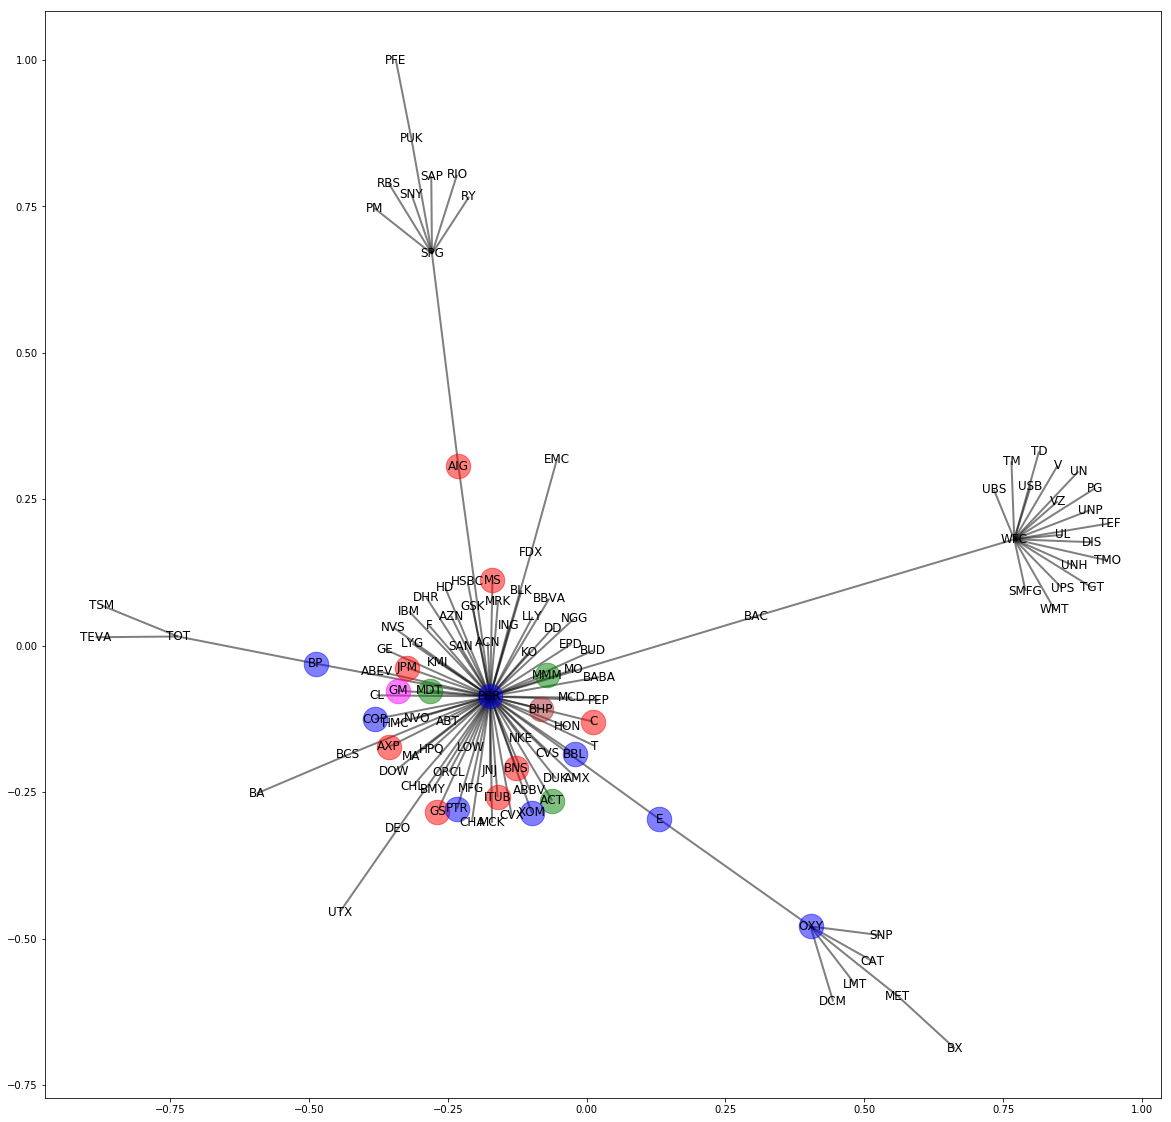

In [668]:
#pos= nx.graphviz_layout(tree_graph,prog='neato',args='-Gmodel=subset -Gratio=fill')

figure(figsize=(20,20))
pos = nx.spring_layout(tree_graph)
nx.draw_networkx_edges(tree_graph,pos,width=2,edge_color='black', alpha=0.5, style="solid")
nx.draw_networkx_labels(tree_graph,pos)
for n in tree_graph.nodes():
    nx.draw_networkx_nodes(tree_graph, pos, [n], node_size = 600,alpha=0.5, node_color = tree_graph.node[n]['color'],with_labels=True)

#axis('off')

#savefig('./data/MST_50B_new.png',dpi=600)